In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Libraries

In [2]:
import keras
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
import os
import pandas as pd

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator

from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input

from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Conv2D, Input, Dense, Flatten,
                                     MaxPooling2D, GlobalAveragePooling2D,
                                     Dropout, BatchNormalization)

In [7]:
img_height, img_width = 500,500
batch_size = 32
n_channels = 3
n_epochs = 10
image_dir = '/content/drive/MyDrive/Data/Data'

Load Data from Directory

In [8]:
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
   validation_split=0.27
)

train_generator = datagen.flow_from_directory(image_dir,
                                              subset='training',
                                              target_size=(img_height, img_width),
                                              batch_size= batch_size,
                                              class_mode = 'categorical')

validation_generator = datagen.flow_from_directory(image_dir,
                                                    subset='validation',
                                                    target_size=(img_height, img_width),
                                                    batch_size= batch_size,
                                                    class_mode = 'categorical')

Found 731 images belonging to 3 classes.
Found 269 images belonging to 3 classes.


In [9]:
basemodel = Xception(weights= 'imagenet', input_shape=(img_height, img_width , n_channels), include_top= False)
basemodel.trainable = False

input = Input(shape = (img_height, img_width , n_channels))
base = basemodel(input, training = False)

x = Conv2D(512, (3,3), padding = 'same', activation = 'relu')(base)
x = Conv2D(256, (3,3), padding = 'same', activation = 'relu')(x)
x = Dropout(rate = 0.3)(x)
x = BatchNormalization()(x)
# x = Conv2D(128, (3,3), padding = 'same', activation = 'relu')(x)
x = MaxPooling2D(pool_size= (2,2))(x)
x = Conv2D(128, (3,3), padding = 'same', activation = 'relu')(x)
x = Dropout(rate = 0.4)(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), padding = 'same', activation = 'relu')(x)
x = GlobalAveragePooling2D()(x)
x = Dropout(rate = 0.35)(x)
x = Dense(128, activation = 'relu')(x)
output = Dense(3, activation = 'softmax')(x)
model = Model(input, output)

lr = 0.0008
optimize = keras.optimizers.Adam(learning_rate=lr)
loss = keras.losses.CategoricalCrossentropy(from_logits=False)

model.compile(optimizer=optimize, loss = loss, metrics= ['accuracy'])
checkpoint = keras.callbacks.ModelCheckpoint(
                            'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
                              save_best_only = True,
                              monitor = 'val_accuracy',
                              mode = 'max')
history = model.fit(train_generator, epochs=n_epochs, validation_data = validation_generator,
                    callbacks = [checkpoint])

Epoch 1/10
23/23 [==============================] - ETA: 0s - loss: 0.4128 - accuracy: 0.8482

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


23/23 [==============================] - 52s 2s/step - loss: 0.4128 - accuracy: 0.8482 - val_loss: 4.2643 - val_accuracy: 0.7286
Epoch 2/10
23/23 [==============================] - 22s 945ms/step - loss: 0.1807 - accuracy: 0.9371 - val_loss: 3.2353 - val_accuracy: 0.6171
Epoch 3/10
23/23 [==============================] - 22s 965ms/step - loss: 0.1275 - accuracy: 0.9603 - val_loss: 2.3849 - val_accuracy: 0.7286
Epoch 4/10
23/23 [==============================] - 23s 1000ms/step - loss: 0.1868 - accuracy: 0.9466 - val_loss: 1.4084 - val_accuracy: 0.7509
Epoch 5/10
23/23 [==============================] - 27s 1s/step - loss: 0.0597 - accuracy: 0.9781 - val_loss: 1.5133 - val_accuracy: 0.7212
Epoch 6/10
23/23 [==============================] - 23s 994ms/step - loss: 0.0261 - accuracy: 0.9904 - val_loss: 1.2002 - val_accuracy: 0.7770
Epoch 7/10
23/23 [==============================] - 22s 970ms/step - loss: 0.0255 - accuracy: 0.9891 - val_loss: 1.1032 - val_accuracy: 0.7770
Epoch 8/10
23/2

Visualize Model Result

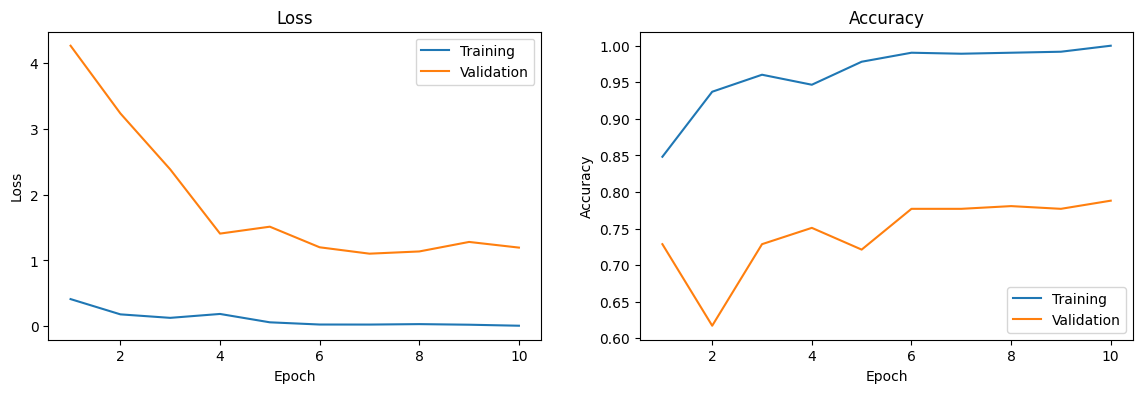

In [11]:
results = history.history
n_epochs = len(results['loss'])

plt.figure(figsize=[14,4])

plt.subplot(1,2,1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.plot(range(1, n_epochs+1), results['loss'], label='Training')
plt.plot(range(1, n_epochs+1), results['val_loss'], label='Validation')
plt.legend()


plt.subplot(1,2,2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.plot(range(1, n_epochs+1), results['accuracy'], label='Training')
plt.plot(range(1, n_epochs+1), results['val_accuracy'], label='Validation')

plt.legend()
plt.show()